# Supervised Learning – Regression and SVM
`jskyzero` `2018/03/26`

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

%matplotlib inline

## 线性回归

某班主任为了了解本班同学的数学和其他科目考试成绩间关系，在某次阶段性测试中，他在全班学生中随机
抽取 1 个容量为 5 的样本进行分析。该样本中 5 位同学的数学和其他科目成绩对应如下表：

| 学生编号    | 1    | 2    | 3    | 4    | 5    |
| ------- | ---- | ---- | ---- | ---- | ---- |
| 数学分数 m  | 89   | 91   | 93   | 95   | 97   |
| 物理分数 p  | 87   | 89   | 89   | 92   | 93   |
| 语文分数 c  | 72   | 76   | 74   | 71   | 76   |
| 英语分数 e  | 83   | 88   | 82   | 91   | 89   |
| 化学分数 ch | 90   | 93   | 91   | 89   | 94   |

利用以上数据，建立 m 与其他变量的多元线性回归方程，并回答下列问题：

1. 在线性回归中，利用梯度下降法，令参数向量𝜽0初始值全为𝟎，学习率α为 1，算出经过第一次迭代后的参数向量𝜽1；
2. 讨论（1）中所算出的𝜽1是否可以使线性回归中的代价函数𝐽(𝜽)下降，即𝐽(𝜽1) < 𝐽(𝜽0)；
3. 讨论是否可以选取更佳的学习率α，经过第一次迭代后，使代价函数𝐽(𝜽)下降得更快；
4. 利用标准方程求出最优的多元线性回归方程（系数精确到 0.01），并预测该班物理分数 88、语文分数 73、英语分数 87、化学分数 92 同学的数学分数。
5. 在 L2 正则化线性回归中，令正则化平衡系数λ为 1，利用标准方程求出最优的 L2 正则化多元线性回归方程（系数精确到 0.01），并比较其与（4）中得出的多元线性回归方程对数学分数的预测，哪个更好。

In [2]:
# import data
m = [89, 91, 93, 95, 97]
p = [87, 89, 89, 92, 93]
c = [72, 76, 74, 71, 76]
e = [83, 88, 82, 91, 89]
ch = [90, 93, 91, 89, 94]
# initial data
x = np.vstack([m, p, c, e, ch])
y = x[0,:].copy()
x[0, :] = 1
# initial theta
theta = np.fromfunction(lambda x : x - x, (5, ))

# h(x) = sum(theta_i * x_i)
hypothesis = lambda x, theta : sum([x_i * theta_i for x_i, theta_i in zip(x, theta)])
# cost = (h(x) - y) ^ 2
cost = lambda y, hx : (hx - y) ** 2
# total_cost
total_cost = lambda x, theta, y : sum([cost(y[i], hypothesis(x[:, i], theta)) for i in range(0, x.shape[1], 1)]) / (2 * x.shape[1])
# update
update = lambda x, y, alpha, theta : np.array([theta[i] - alpha * np.mean([(hypothesis(x[:, j], theta) - y[j]) *  x[i, j] for j in range(0, x.shape[1], 1)]) for i in range(0, len(theta), 1)])

In [3]:
# 1. 在线性回归中，利用梯度下降法，令参数向量𝜽0初始值全为𝟎，学习率α为 1，算出经过第一次迭代后的参数向量𝜽1；

theta_1 = update(x, y, 1,theta)
print("theta_1 = ", theta_1)

theta_1 =  [  93.  8376.  6864.6 8059.8 8501.8]


In [4]:
# 2. 讨论（1）中所算出的𝜽1是否可以使线性回归中的代价函数𝐽(𝜽)下降，即𝐽(𝜽1) < 𝐽(𝜽0)；

print("J(theta_0) = ", total_cost(x, theta, y))
print("J(theta_1) = ", total_cost(x, theta_1, y))
print("J(theta_1) < J(theta_0) = ", total_cost(x, theta_1, y) < total_cost(x, theta, y))

J(theta_0) =  4328.5
J(theta_1) =  3743077544562.6123
J(theta_1) < J(theta_0) =  False


In [5]:
# 3. 讨论是否可以选取更佳的学习率α，经过第一次迭代后，使代价函数𝐽(𝜽)下降得更快；

max_drop = 0
best_alpha = 1

alpha = 1
while alpha > 0.000001:
    before = total_cost(x, theta, y)
    after = total_cost(x, update(x, y, alpha,theta), y)
    # if better update
    if (before - after) > max_drop:
        max_drop = before - after
        best_alpha = alpha
    alpha = alpha / 2
print("best_alpha = ", best_alpha)
print("max_drop = ", max_drop)

best_alpha =  3.0517578125e-05
max_drop =  4281.381486414343


In [6]:
# 4. 利用标准方程求出最优的多元线性回归方程（系数精确到 0.01），并预测该班物理分数 88、语文分数 73、英语分数 87、化学分数 92 同学的数学分数。

# why there is a transpose ? 
# make sure every row is a sample
X = np.matrix(x).T
Y = np.matrix(y)

theta_4 = np.array((X.T * X).I * X.T * Y.T)
print("theta_4 = ", list(map(lambda x : "{:.2f}".format(x[0]), theta_4)))
print("J(theta_4) = {:.2f}".format(total_cost(x, theta_4, y)[0]))

x_test = [1, 88, 73, 87, 92]
print("prediction = {:.2f}".format(hypothesis(x_test, theta_4)[0]))

theta_4 =  ['-19.50', '1.69', '0.37', '-0.31', '-0.44']
J(theta_4) = 0.00
prediction = 88.94


In [7]:
# 5. 在 L2 正则化线性回归中，令正则化平衡系数λ为 1，利用标准方程求出最优的 L2 正则化多元线性回归方程（系数精确到 0.01），
# 并比较其与（4）中得出的多元线性回归方程对数学分数的预测，哪个更好。

I = np.matrix([[ 1 if j == i and not j == 0 else 0 for j in range(0, 5, 1)]for i in range(0, 5, 1)])
theta_5 = np.array((X.T * X - 1 * I ) ** -1 * X.T * Y.T)
print("theta_5 = ", list(map(lambda x : "{:.2f}".format(x[0]), theta_5)))
print("J(theta_5) = {:.2f}".format(total_cost(x, theta_5, y)[0]))

# x_test = [1, 88, 73, 87, 92]
print("prediction = {:.2f}".format(hypothesis(x_test, theta_5)[0]))

theta_5 =  ['-41.19', '1.85', '-0.38', '-0.45', '0.37']
J(theta_5) = 0.10
prediction = 89.64


###  哪个更好
我觉得加了正则项的预测可能更好一些，因为待预测学生各课成绩都比编号1的学生要好，就符合常识上来说，我们认为他的数学分数也具有较大可能性比编号1的同学的数学成绩要好，因而加了正则项的预测可能更加符合实际一些。

## 逻辑回归
研究人员对使用雌激素与子宫内膜癌发病间的关系进行了 1:1 配对的病例对照研究。病例与对照按年龄相近、婚姻状况相同、生活的社区相同进行了配对。收集了年龄、雌激素药使用、胆囊病史、高血压和非雌激素药
使用的数据。变量定义及具体数据如下：

match：配比组

case：case=1 病例；case=0 对照（未发病）

est：est=1 使用过雌激素；est=0 未使用雌激素；

gall：gall=1 有胆囊病史；gall=0 无胆囊病史；

hyper：hyper=1 有高血压；hyper=0 无高血压；

nonest：nonest=1 使用过非雌激素；nonest=0 未使用过非雌激素；

Problem Set #1


| Match | Case | Est  | Gall | Hyper | Nonest |
| ----- | ---- | ---- | ---- | ----- | ------ |
|1 | 1 | 1 | 1 | 0 | 1|
|1 | 0 | 0 | 1 | 0 | 0|
|2 | 1 | 1 | 0 | 1 | 1|
|2 | 0 | 0 | 0 | 0 | 1|
|3 | 1 | 1 | 1 | 0 | 1|
|3 | 0 | 1 | 0 | 1 | 1|
|4 | 1 | 1 | 0 | 0 | 0|
|4 | 0 | 1 | 0 | 1 | 1|
|5 | 1 | 1 | 0 | 1 | 1|
|5 | 0 | 0 | 0 | 0 | 0|
|6 | 1 | 1 | 1 | 0 | 1|
|6 | 0 | 0 | 0 | 0 | 0|
|7 | 1 | 1 | 0 | 0 | 1|
|7 | 0 | 0 | 0 | 0 | 0|
|8 | 1 | 1 | 1 | 1 | 1|
|8 | 0 | 0 | 0 | 1 | 1|
|9 | 1 | 1 | 0 | 0 | 1|
|9 | 0 | 1 | 0 | 0 | 1|
|10 | 1 | 0 | 0 | 0 | 1|
|10 | 0 | 0 | 0 | 0 | 1|
|11 | 1 | 1 | 0 | 1 | 1|
|11 | 0 | 1 | 0 | 1 | 1|
|12 | 1 | 0 | 0 | 0 | 1|
|12 | 0 | 0 | 0 | 1 | 1|
|13 | 1 | 1 | 0 | 1 | 1|
|13 | 0 | 0 | 0 | 0 | 0|
|14 | 1 | 1 | 0 | 0 | 1|
|14 | 0 | 0 | 0 | 0 | 0|
|15 | 1 | 1 | 0 | 1 | 1|
|15 | 0 | 1 | 0 | 0 | 1|
|16 | 1 | 1 | 0 | 0 | 1|
|16 | 0 | 1 | 0 | 1 | 1|
|17 | 1 | 1 | 0 | 0 | 1|
|17 | 0 | 0 | 0 | 0 | 0|
|18 | 1 | 0 | 1 | 0 | 1|
|18 | 0 | 0 | 0 | 1 | 0|
|19 | 1 | 1 | 1 | 0 | 1|
|19 | 0 | 1 | 1 | 0 | 0|
|20 | 1 | 1 | 0 | 0 | 0|
|20 | 0 | 1 | 0 | 1 | 1|

1. 调用逻辑回归函数或实现求解 L2 逻辑回归分析的梯度下降算法，求出最优的逻辑回归模型；
2. 尝试找出对影响子宫内膜癌发病的最直接的因素；
3. 编程实现求解 L2 正则化逻辑回归分析的梯度下降算法，并求出正则化平衡系数λ为 1 时的最优正则化逻辑回归模型（加分题）。

In [9]:
data = [
1,1,1,1,0,1,
1,0,0,1,0,0,
2,1,1,0,1,1,
2,0,0,0,0,1,
3,1,1,1,0,1,
3,0,1,0,1,1,
4,1,1,0,0,0,
4,0,1,0,1,1,
5,1,1,0,1,1,
5,0,0,0,0,0,
6,1,1,1,0,1,
6,0,0,0,0,0,
7,1,1,0,0,1,
7,0,0,0,0,0,
8,1,1,1,1,1,
8,0,0,0,1,1,
9,1,1,0,0,1,
9,0,1,0,0,1,
10,1,0,0,0,1,
10,0,0,0,0,1,
11,1,1,0,1,1,
11,0,1,0,1,1,
12,1,0,0,0,1,
12,0,0,0,1,1,
13,1,1,0,1,1,
13,0,0,0,0,0,
14,1,1,0,0,1,
14,0,0,0,0,0,
15,1,1,0,1,1,
15,0,1,0,0,1,
16,1,1,0,0,1,
16,0,1,0,1,1,
17,1,1,0,0,1,
17,0,0,0,0,0,
18,1,0,1,0,1,
18,0,0,0,1,0,
19,1,1,1,0,1,
19,0,1,1,0,0,
20,1,1,0,0,0,
20,0,1,0,1,1]

# initial data
type_list = ["case","est", "gall", "hyper", "nonest"]
x = np.array([data[i + 1::6] for i in range(0, len(type_list), 1)])
y = x[0,:].copy()
x[0:1] = 1


# h(x) = sum(theta_i * x_i)
hypothesis = lambda x, theta : 1 / (1 + math.e ** (- 1 * sum([x_i * theta_i for x_i, theta_i in zip(x, theta)])))
# cost = (h(x) - y) ^ 2
cost = lambda y, hx : -y  *  math.log(hx) - (1 - y) * math.log(1 - hx)

In [10]:
# 1. 调用逻辑回归函数或实现求解 L2 逻辑回归分析的梯度下降算法，求出最优的逻辑回归模型；

# initial theta
theta = np.array([ 0 for i in range(0, len(type_list), 1)])

times = 0
max_times = 5000
space = 0.1

while (total_cost(x, theta, y) > 0.01 and times < max_times):
    theta = update(x, y, space, theta)
#     if times % 1000 == 0:
#         print(total_cost(x, theta, y))
    times = times + 1
theta

print("theta = {}".format(theta))
print("total cost = {}".format(total_cost(x, theta, y)))


# this part is test the answer is right or not
# from sklearn import linear_model
# logreg = linear_model.LogisticRegression(solver='newton-cg')
# logreg.fit(x.T, y)

# print(total_cost(x, logreg.coef_[0], y))
# print(logreg.predict(x.T))
# print(sum(abs(logreg.predict(x.T) - y)))
# y2 = [1 if hypothesis(x_i, theta) > 0.5  else 0 for x_i in x.T]
# print(y2)
# print(sum(abs(y2 - y)))

theta = [-2.65434079  2.21331532  1.06088789 -1.76740262  2.22596908]
total cost = 0.23922172270876577


In [11]:
# 尝试找出对影响子宫内膜癌发病的最直接的因素；
# 我们认为对预测影响最大，即权值最大

print("max type is {}".format(type_list[1:][np.argmax(abs(theta[1:]))]))

max type is nonest


In [12]:
# total_cost
total_cost = lambda x, theta, y, lambda_theta : sum([cost(y[i], hypothesis(x[:, i], theta)) for i in range(0, x.shape[1], 1)]) /  x.shape[1] + lambda_theta * np.sum(theta**2)
# update
update = lambda x, y, alpha, theta, lambda_theta : np.array([theta[i] * (1 - alpha * lambda_theta / x.shape[1]) - alpha * np.mean([(hypothesis(x[:, j], theta) - y[j]) *  x[i, j] for j in range(0, x.shape[1], 1)]) for i in range(0, len(theta), 1)])


# initial theta
theta = np.array([ 0 for i in range(0, len(type_list), 1)])

times = 0
max_times = 5000
space = 0.1
lambda_theta = 0.1

while (total_cost(x, theta, y, lambda_theta) > 0.01 and times < max_times):
    theta = update(x, y, space, theta, lambda_theta)
#     if times % 1000 == 0:
#         print(total_cost(x, theta, y))
    times = times + 1
theta

print("theta = {}".format(theta))
print("total cost = {}".format(total_cost(x, theta, y, lambda_theta)))

theta = [-2.15912181  1.89966641  0.90523323 -1.47919078  1.78984312]
total cost = 1.930246292669674


## 支持向量机
考虑以下的两类训练样本集

| 特征 1 | 特征 2 | 类标   |
| ---- | ---- | ---- |
| 1    | 1    | +    |
| 2    | 2    | +    |
| 2    | 0    | +    |
| 0    | 0    | -    |
| 1    | 0    | -    |
| 0    | 1    | -    |

1.  在图中画出这 6 个训练样本点和支持向量机对应的最优超平面（决策边界），并写出对应的超平面方程；
2.  假设增加一些训练样本点，这些点能被正确分类且远离最优超平面（决策边界），说明最优超平面（决策边界）不受新增训练样本点影响，而线性回归会受影响的原因；
3.  指出哪些是支持向量，并求出两个异类支持向量到最优超平面（决策边界）的距离之和；
4.  通过寻找拉格朗日待定乘数αi来构造对偶空间的解，并将其与（1）中结果作比较。

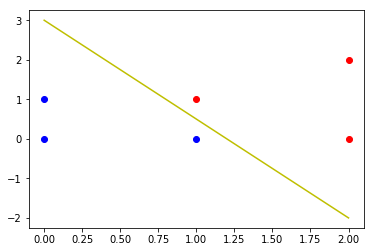

In [13]:
feature_1 = [1, 2, 2, 0, 1, 0]
feature_2 = [1, 2, 0, 0, 0, 1]
label = [1, 1, 1, -1, -1, -1]

super_space_function = lambda x : 3 - 2.5 * x
x = np.linspace(min(feature_1), max(feature_1), 1000)
y = np.vectorize(super_space_function)(x)
plt.plot(x, y, color='y', label="super_space_function")


for i in range(0, len(label)):
    color = 'r' if label[i] == 1 else 'b' 
    plt.plot(feature_1[i], feature_2[i], 'ro', color=color)

1. 画出这 6 个训练样本点和支持向量机对应的最优超平面如上图，对应的超平面方程是 $y + 2.5x - 3 = 0$
2. 因为SVM中影响超平面的主要是距离超平面最近的那些“支持向量”，已知训练样本是能正确分类但是原理最优超平面的话，这些训练样本就并不会影响到最优超平面，而所有样本都是会影响到线性回归的预测函数，故会影响到线性回归。
3. 如图，(1,1) (0, 1) (1, 1) (2,0) 是离超平面最近的向量（支持向量），选取(1, 0) (1, 1)两个点，求得距离为$\frac{2\sqrt{29}}{29}$
4. 求解过程如下：

[-1.4]
[[1.2 0.4]]
[[1. 0.]
 [0. 1.]
 [1. 1.]
 [2. 0.]]


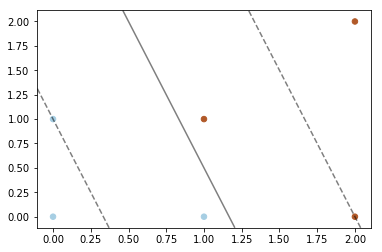

In [14]:
from sklearn import svm
clf = svm.SVC(kernel='linear')
X = np.array([feature_1, feature_2]).T
y = label
clf.fit(X, y) 
print(clf.intercept_)
print(clf.coef_)
print(clf.support_vectors_)


plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)

# plot the decision function
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf.decision_function(xy).reshape(XX.shape)
# plot decision boundary and margins
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])
# plot support vectors
ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100,
           linewidth=1, facecolors='none')
